In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [14]:
df=pd.read_csv("Mall_Customers.csv")

In [15]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
192,193,Male,33,113,8
53,54,Male,59,43,60
171,172,Male,28,87,75
54,55,Female,50,43,45
181,182,Female,32,97,86


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
df_new = df[["Annual Income (k$)", "Spending Score (1-100)"]]

print(df_new.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


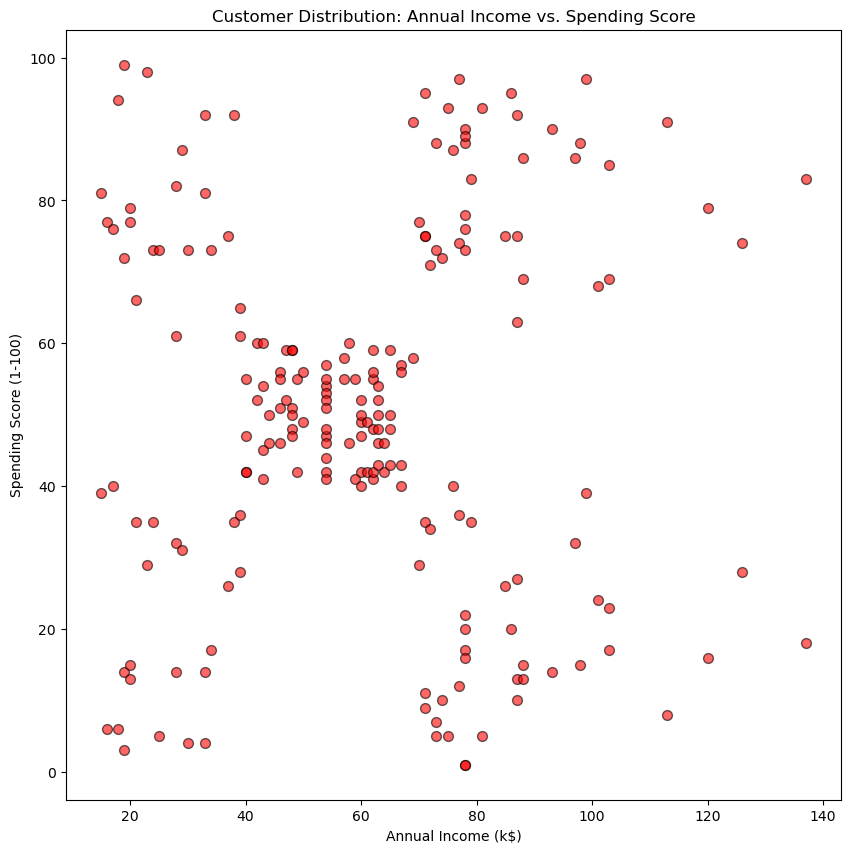

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(
    df["Annual Income (k$)"], 
    df["Spending Score (1-100)"], 
    c='red', 
    s=50, 
    alpha=0.6, 
    edgecolors='k'
)


plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Distribution: Annual Income vs. Spending Score")

plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

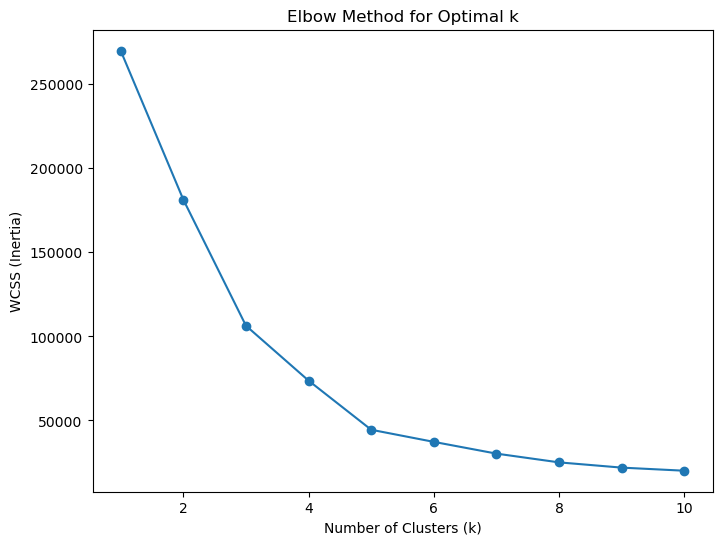

In [21]:
wcss = []  


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)   

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()    

From the above elbow method for finding the optimal k we can see initially as value of k increased the wcss decreased at a great rate bt after a certain value of k in our case 5 the decrease in wcss somehow became stable. so we chose k =5 as our optimal k.

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 1 points: 81
Cluster 2 points: 39
Cluster 3 points: 22
Cluster 4 points: 35
Cluster 5 points: 23
K-Means Silhouette Score: 0.5539


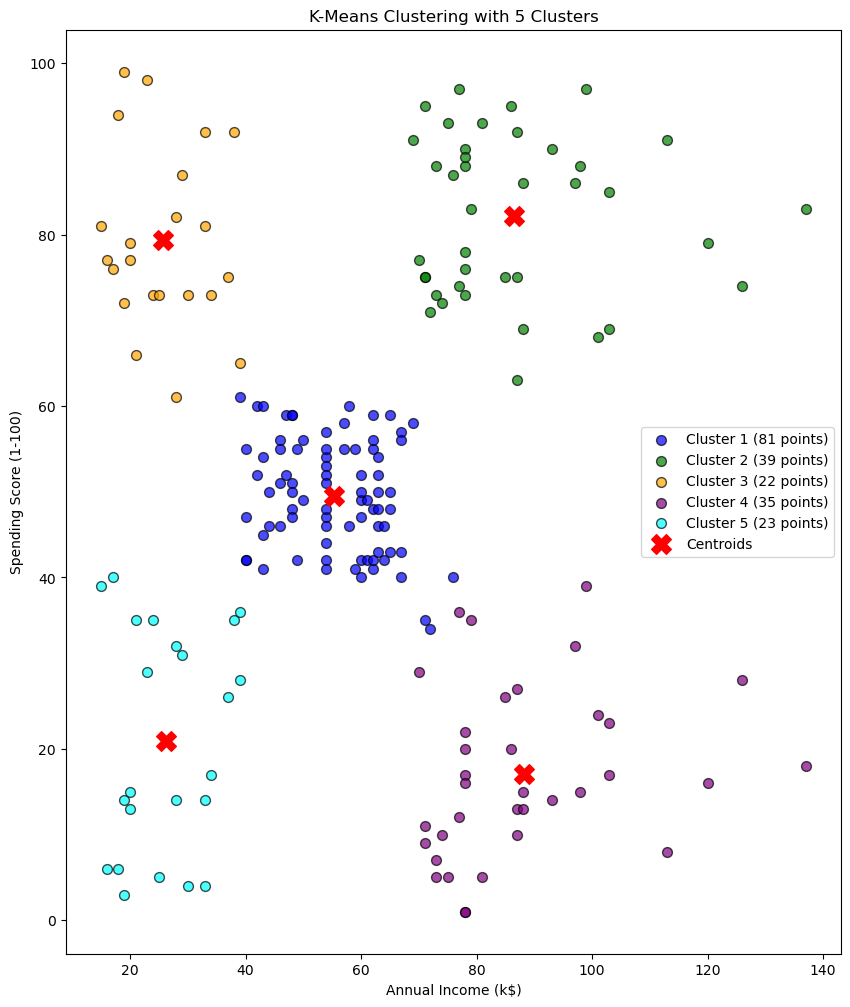

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_new)
centroids = kmeans.cluster_centers_

unique_labels = np.unique(labels)
for label in unique_labels:
    count = np.sum(labels == label)
    print(f"Cluster {label+1} points: {count}")

sil_score = silhouette_score(df_new, labels)
print(f"K-Means Silhouette Score: {sil_score:.4f}")

plt.figure(figsize=(10,12))
colors = ['blue', 'green', 'orange', 'purple', 'cyan']

for i in range(5):
    plt.scatter(
        df_new.values[labels == i, 0], 
        df_new.values[labels == i, 1],
        s=50, 
        c=colors[i], 
        label=f'Cluster {i+1} ({np.sum(labels==i)} points)', 
        alpha=0.7, 
        edgecolors='k'
    )


plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='red', 
    s=200, 
    marker='X', 
    label='Centroids'
)


plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering with 5 Clusters")
plt.legend()
plt.show()


## Agglomerative Hierarchical Clustering

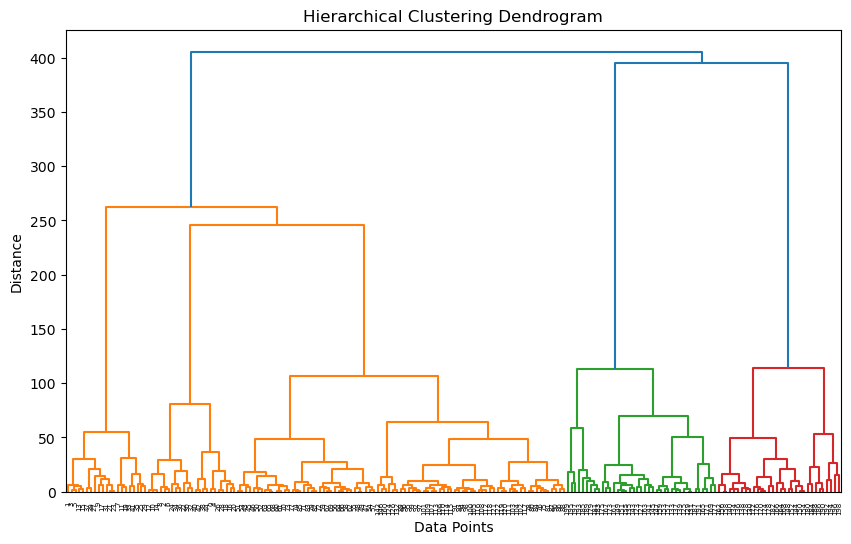

In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_new, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In dendograms the vertical axis = distance (dissimilarity) between clusters the horizontal axis = individual data points.
Merges (joins) happen as you move up → small clusters merge into bigger ones.

To find the optimal number of clusters, use the largest vertical gap (no horizontal lines crossing it).
Now looking at this dendrogram we can say that the biggest jump in height (distance) is around 400.
If you draw a horizontal line slightly below 400 (e.g. at 350),
It will cut three main vertical branches.
So, optimal number of clusters = 3.

Cluster 1 points: 129
Cluster 2 points: 32
Cluster 3 points: 39
Hierarchical Clustering Silhouette Score: 0.4618


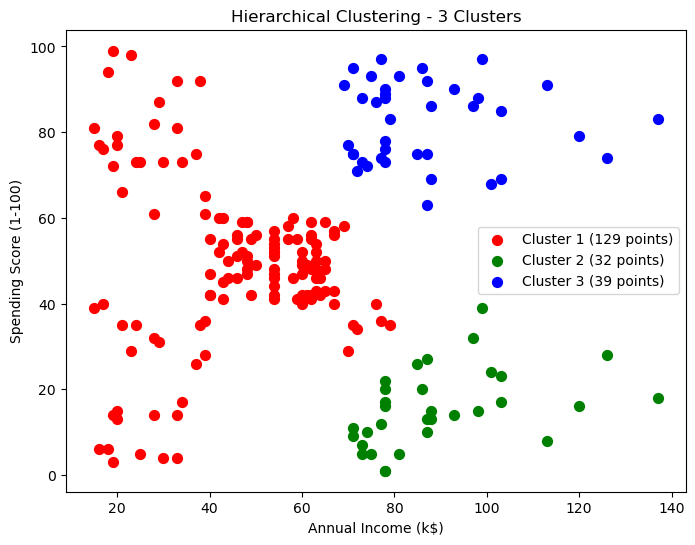

In [67]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(df_new)


unique_labels = np.unique(cluster_labels)
for label in unique_labels:
    count = np.sum(cluster_labels == label)
    print(f"Cluster {label+1} points: {count}")

if len(unique_labels) > 1:
    sil_score = silhouette_score(df_new, cluster_labels)
    print(f"Hierarchical Clustering Silhouette Score: {sil_score:.4f}")
else:
    print("Not enough clusters to compute silhouette score.")


plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue'] 

for cluster in unique_labels:
    plt.scatter(
        df_new["Annual Income (k$)"][cluster_labels == cluster],
        df_new["Spending Score (1-100)"][cluster_labels == cluster],
        s=50,
        c=colors[cluster],
        label=f'Cluster {cluster+1} ({np.sum(cluster_labels==cluster)} points)'
    )

plt.title('Hierarchical Clustering - 3 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


## DBSCAN Clustering 


Estimated number of clusters: 3
Number of noise points: 17
Cluster 1 points: 138
Cluster 2 points: 12
Cluster 3 points: 33
Noise points: 17
DBSCAN Silhouette Score: 0.3747


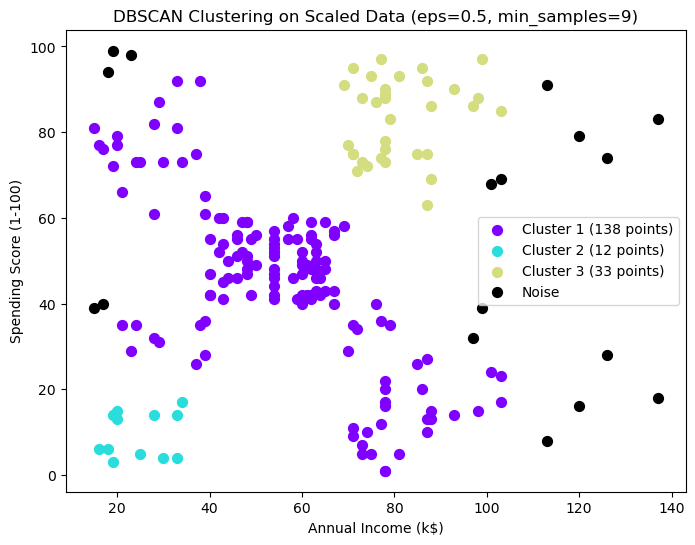

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

eps = 0.5    
min_samples = 9

dbscan = DBSCAN(eps=eps, min_samples=min_samples)

cluster_labels = dbscan.fit_predict(df_scaled)

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

unique_labels = set(cluster_labels)
for label in unique_labels:
    count = np.sum(cluster_labels == label)
    if label == -1:
        print(f"Noise points: {count}")
    else:
        print(f"Cluster {label+1} points: {count}")

mask = cluster_labels != -1
if n_clusters > 1:
    sil_score = silhouette_score(df_scaled[mask], cluster_labels[mask])
    print(f"DBSCAN Silhouette Score: {sil_score:.4f}")
else:
    print("DBSCAN: Not enough clusters to compute silhouette score.")

plt.figure(figsize=(8,6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_member_mask = (cluster_labels == k)
    if k == -1:
        col = 'black'
        label = 'Noise'
    else:
        label = f'Cluster {k+1} ({np.sum(class_member_mask)} points)'
    
    plt.scatter(
        df_new["Annual Income (k$)"][class_member_mask],
        df_new["Spending Score (1-100)"][class_member_mask],
        s=50,
        c=[col],
        label=label
    )

plt.title(f'DBSCAN Clustering on Scaled Data (eps={eps}, min_samples={min_samples})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
